In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import warnings
warnings.filterwarnings("ignore")

In [167]:
from curated_set_services import CuratedSet
from curated_set_services import show_msa_jl
from pynucl.hist_features import hist_shf4seq, hist_features
from Bio.Align.AlignInfo import SummaryInfo
from pytexshade import ipyshade
from ete3 import Tree, TreeStyle
!mkdir -p tmp

In [107]:
#Load data from histones.csv
curated_set = CuratedSet()
cs=curated_set

In [94]:
#Access pandas dataframe with the histones information
#cs.data
cs.data.head()

,accession,type,variant,subvariant,doublet,gi,geneid,taxonomyid,organism,phylum,class,info,references,sequence
XP_011215280.1,XP_011215280.1,H2A,canonical_H2A,,,752439274,,9646,Ailuropoda melanoleuca,Chordata,Mammalia,,,MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGA...
XP_011216221.1,XP_011216221.1,H2B,canonical_H2B,,,752441783,,9646,Ailuropoda melanoleuca,Chordata,Mammalia,,,MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVL...
XP_011215272.1,XP_011215272.1,H2A,H2A.B,,,752439251,,9646,Ailuropoda melanoleuca,Chordata,Mammalia,,,MPGDRSRRGSSSGQRRTRSRTARAELSFSVSHVERLLREGHYAQRL...
XP_002927211.2,XP_002927211.2,H2A,H2A.L,,,301783589,,9646,Ailuropoda melanoleuca,Chordata,Mammalia,,,MSGRRSPWHSHQHKRHGLSRSMRAELQFPVSRVDRLLREGCYAQRL...
XP_002913536.1,XP_002913536.1,H2A,H2A.P,,,301755368,,9646,Ailuropoda melanoleuca,Chordata,Mammalia,,,MSGKKSHESSYQTQAHLITTELQVPVSYVDRLLQENQYNHPLSSST...


## Subsetting and accessing data about histones

In [21]:
#cs.data.accession
#cs.data['accession']
# cs.data[cs.data.type == 'H2A']
# cs.data[(cs.data['type'] == 'H2A') & (cs.data['class'] == 'Mammalia')]
cs.data.query('type == "H2A" & `class`=="Mammalia" & variant.str.contains("H2A.Z")', engine='python')['accession']

NP_002097.1    NP_002097.1
NP_036544.1    NP_036544.1
NP_619541.1    NP_619541.1
NP_958844.1    NP_958844.1
NP_958924.1    NP_958924.1
NP_958925.1    NP_958925.1
Name: accession, dtype: object

## Technical maintenance of the list

In [11]:
# Identifying duplicated accessions
list(cs.has_duplicates())

[]

In [ ]:
# check with NCBI if accesssions have new versions and update them. E.g. NP_12345.1 has now NP_12345.2.
from Bio import Entrez
Entrez.email = 'histoneDB@intbio.org'
cs.update_accession_version()

Unexpected error: <class 'KeyboardInterrupt'>, Retrying, attempt 0
Unexpected error: <class 'KeyboardInterrupt'>, Retrying, attempt 1
Unexpected error: <class 'KeyboardInterrupt'>, Retrying, attempt 2
Unexpected error: <class 'KeyboardInterrupt'>, Retrying, attempt 3
Unexpected error: <class 'KeyboardInterrupt'>, Retrying, attempt 4


In [ ]:
#Fetch and update taxids and taxonomic data from NCBI by accessions
curated_set.update_taxids() #update only for blank data use blank_data=True, update for specific accessions use accessions=[<list of accessions>]

In [ ]:
#Update sequences
curated_set.update_sequence() #update only for blank data use blank_data=True

In [ ]:
# access to fasta_seqrec dictionary
curated_set.fasta_seqrec

In [ ]:
cs.save() #cs.save(filename='<filename>')

## Multiple Sequence Alignment, trimming, visualization

In [160]:
#Make algnment with Muscle
msa=cs.muscle_aln(cs.data.query('type == "H2A" & variant.str.contains("H2A.Z") & `class`=="Mammalia"')['accession'],options=["-maxiters","16","-gapopen","-20"],debug=False)

In [189]:
#View MSA inline in jupyterlab with jupyterlab-fasta extension, otherwise will just print it.
show_msa_jl(msa)

>H2A.Z-Homo-sapiens-NP-002097.1 H2A.Z_Homo_sapiens_NP_002097.1 NP_002097.1 histone: H2A variant: H2A.Z organism: Homo sapiens
MAGGKAGKDSGKAKTKAVSRSQRAGLQFPVGRIHRHLKSRTTSHGRVGATAAVYSAAILE
YLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLIKATIAGGGVIPHIHKSLIG
KKGQQKTV-----
>H2A.Z-Homo-sapiens-NP-958844.1 H2A.Z_Homo_sapiens_NP_958844.1 NP_958844.1 histone: H2A variant: H2A.Z organism: Homo sapiens
--------------------------MFPVGRIHRHLKTRTTSHGRVGATAAVYSAAILE
YLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLIKATIAGGGVIPHIHKSLIG
KKGQQKTA-----
>H2A.Z-Homo-sapiens-NP-619541.1 H2A.Z_Homo_sapiens_NP_619541.1 NP_619541.1 histone: H2A variant: H2A.Z organism: Homo sapiens
MAGGKAGKDSGKAKAKAVSRSQRAGLQFPVGRIHRHLKTRTTSHGRVGATAAVYSAAILE
YLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLIKATIAGGEKRRCS------
-------------
>H2A.Z-Homo-sapiens-NP-958925.1 H2A.Z_Homo_sapiens_NP_958925.1 NP_958925.1 histone: H2A variant: H2A.Z organism: Homo sapiens
MAGGKAGKDSGKAKAKAVSRSQRAGLQ---------------------------------
-----VLELAGNASKDLKVKRITPRHL

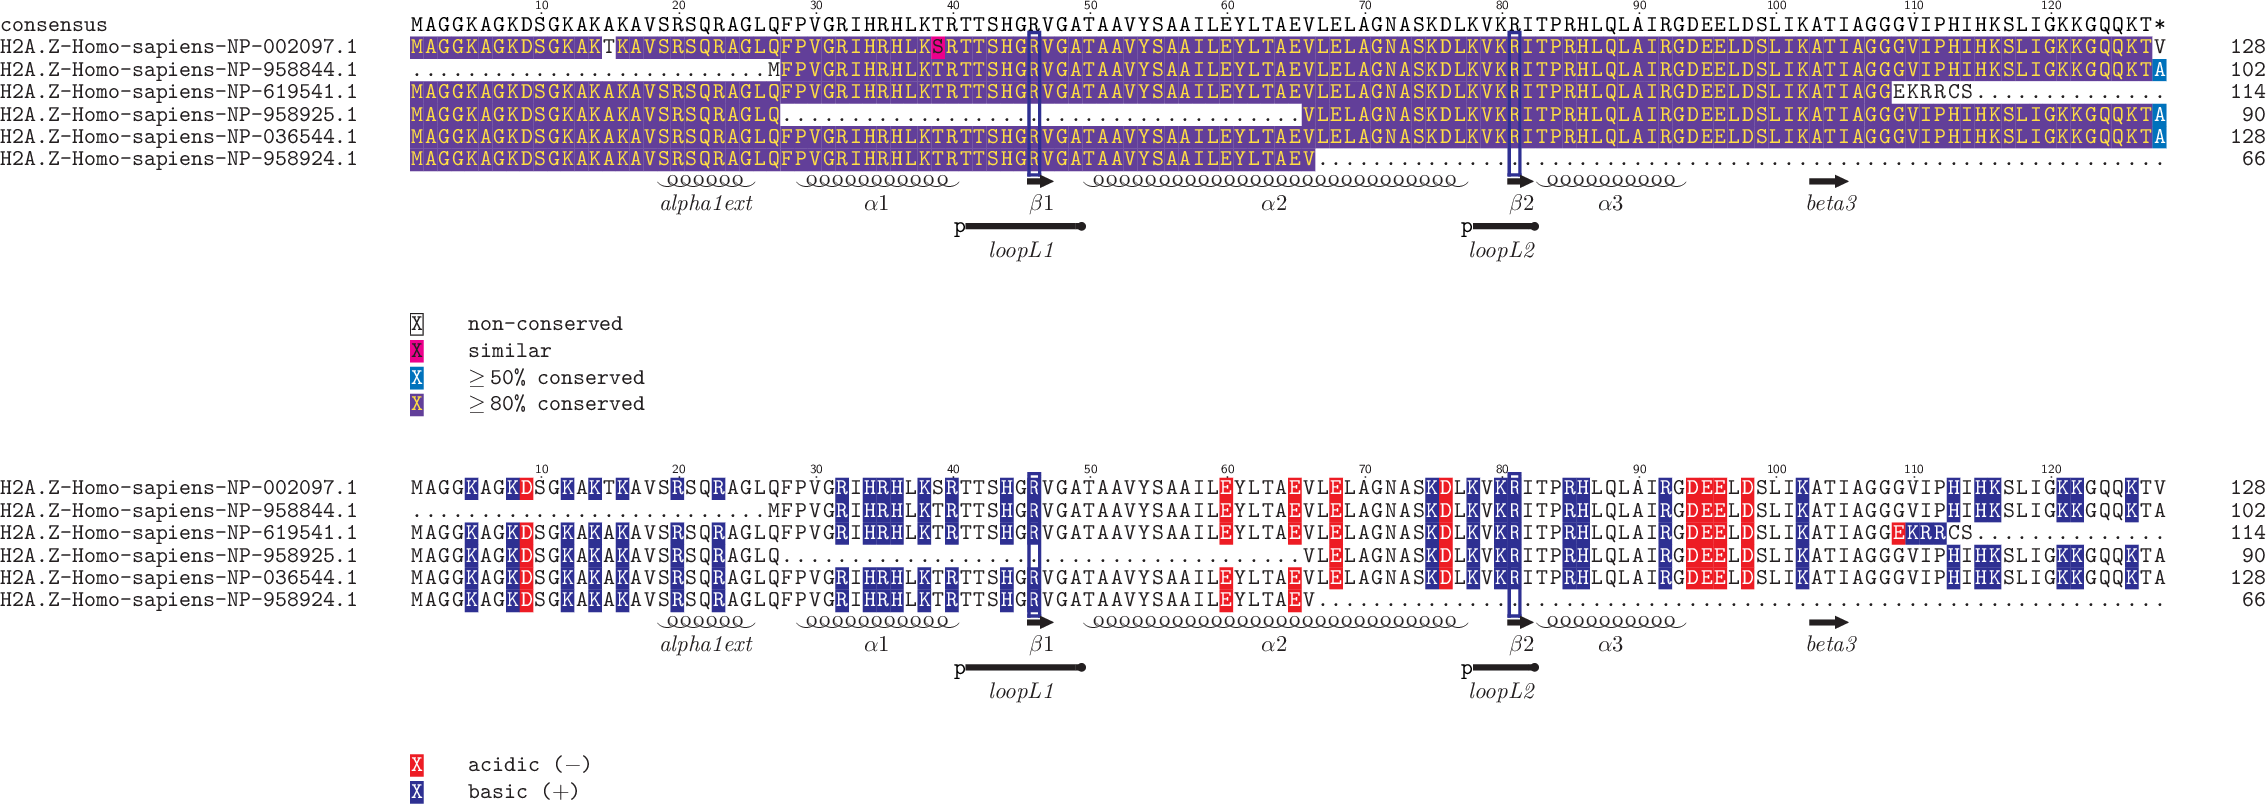

In [161]:
#via pytexshade, see function options here https://github.com/intbio/pytexshade/blob/3b4620c95f6607fffc06063f582bdb294d68fc09/pytexshade/shade.py#L134
ipyshade.shadedmsa(msa,shading_modes=['similar','charge_functional'],ruler=True,features=hist_shf4seq(SummaryInfo(msa).dumb_consensus(threshold=0.1,ambiguous='X')))

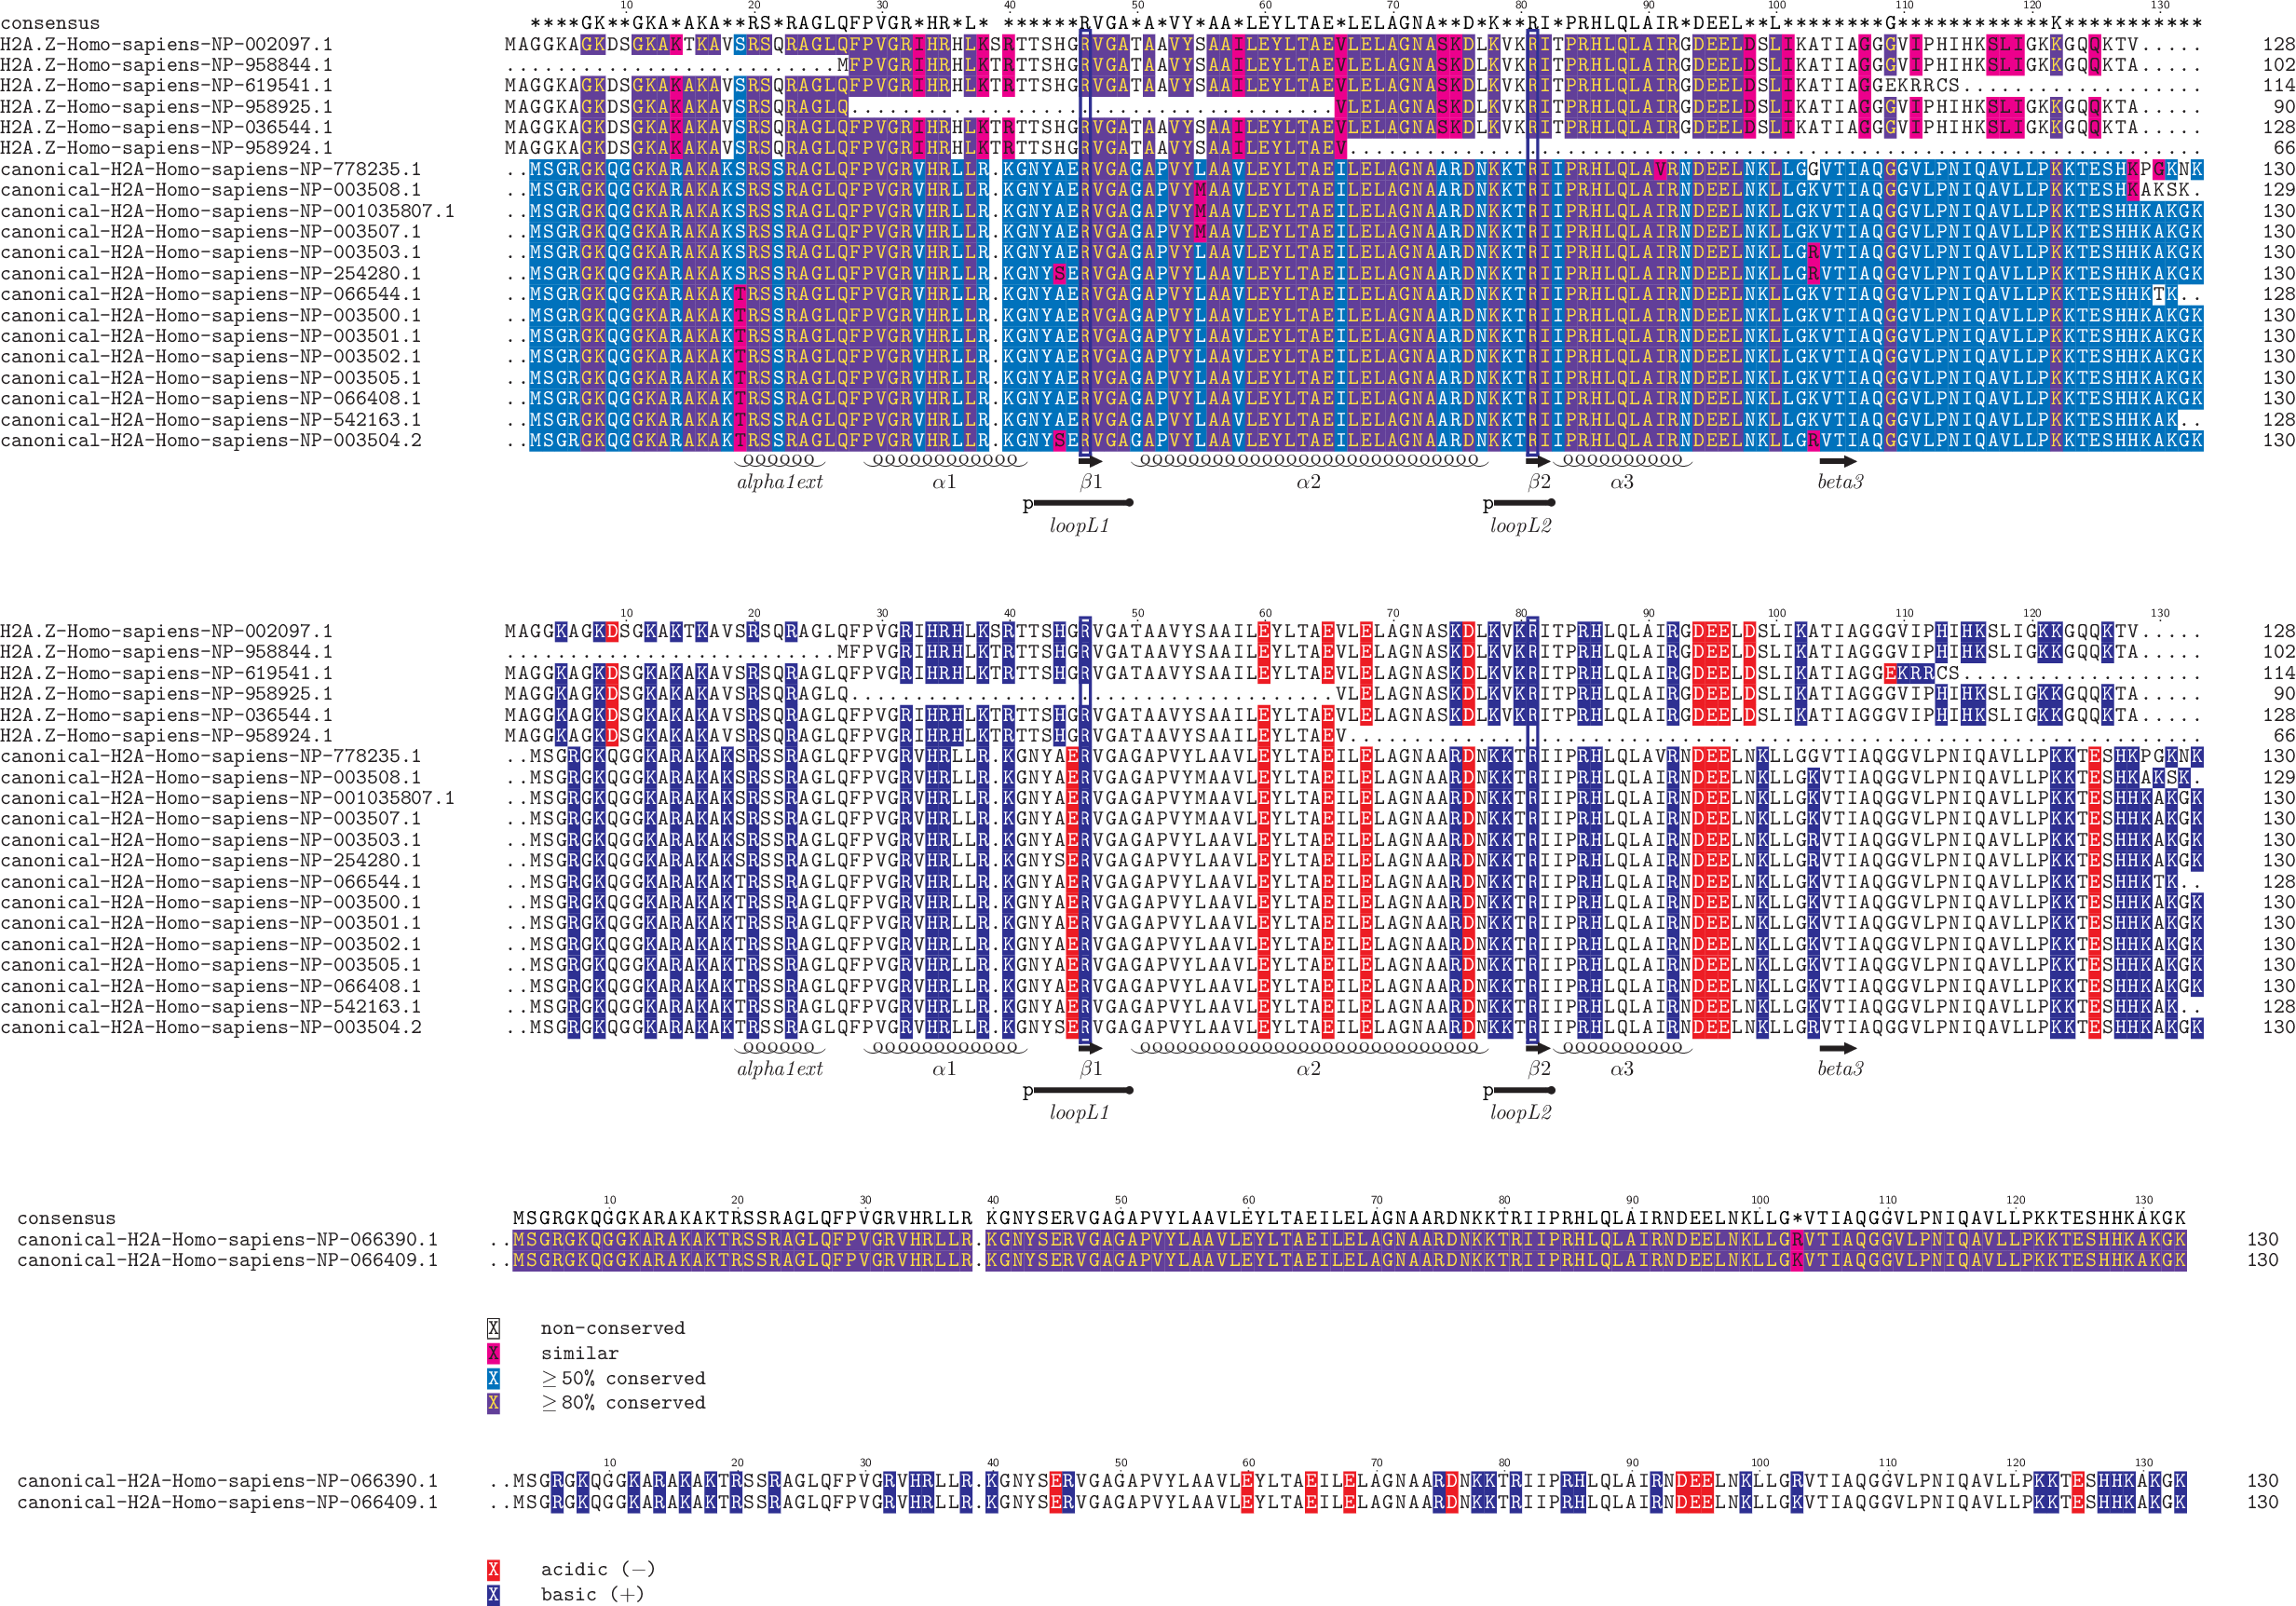

In [164]:
msa=cs.muscle_aln(cs.data.query('type == "H2A" & (variant=="canonical_H2A" | variant=="H2A.Z") & organism=="Homo sapiens"')['accession'],options=["-maxiters","16","-gapopen","-20"],debug=False)
ipyshade.shadedmsa(msa,shading_modes=['similar','charge_functional'],ruler=True,features=hist_shf4seq(SummaryInfo(msa).dumb_consensus(threshold=0.1,ambiguous='X')))

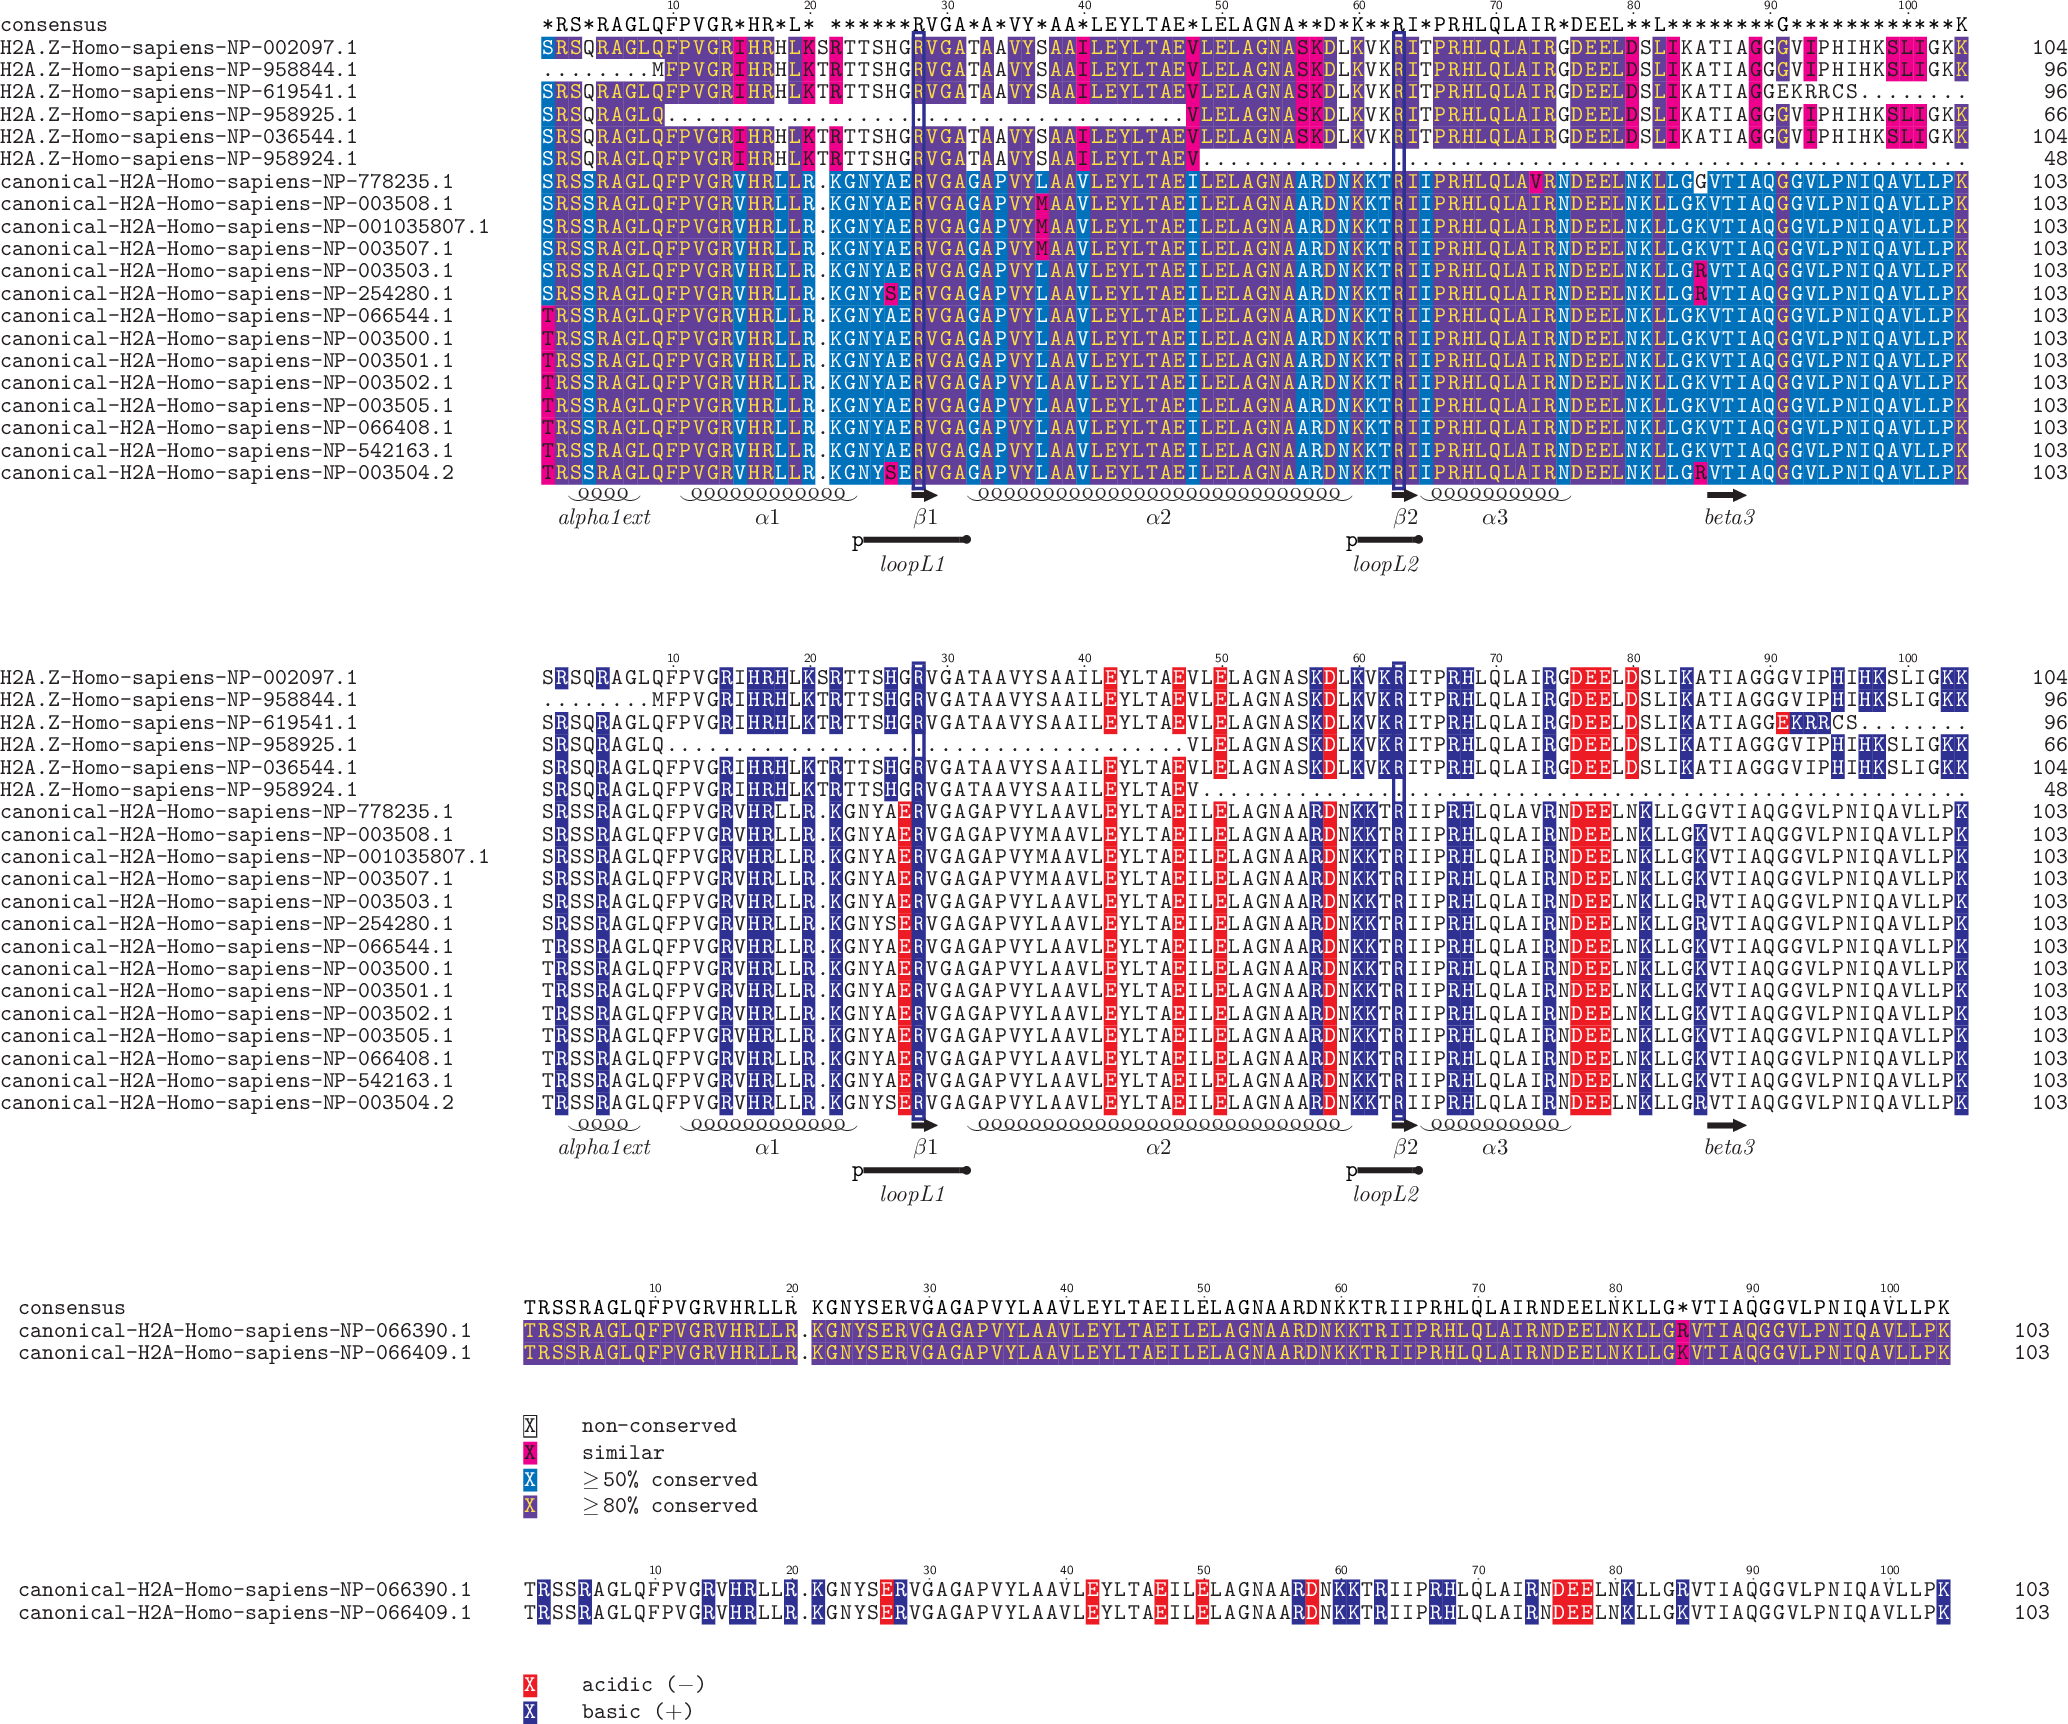

In [188]:
#trim alignment to histone core
core=hist_features(SummaryInfo(msa).dumb_consensus(threshold=0.1,ambiguous='X'))[1]
msa_core=msa[:,core.location.start:core.location.end]
ipyshade.shadedmsa(msa_core,shading_modes=['similar','charge_functional'],ruler=True,features=hist_shf4seq(SummaryInfo(msa_core).dumb_consensus(threshold=0.1,ambiguous='X')))

## Phylogenetic trees using FastTree
#intro to phylogenetics https://www.ebi.ac.uk/training/online/courses/introduction-to-phylogenetics/what-is-a-phylogeny/aspects-of-phylogenies/branches/



In [122]:
msa=cs.muscle_aln(cs.data.query('type == "H2A" & variant=="H2A.Z" & `class`=="Mammalia"')['accession'],debug=False)

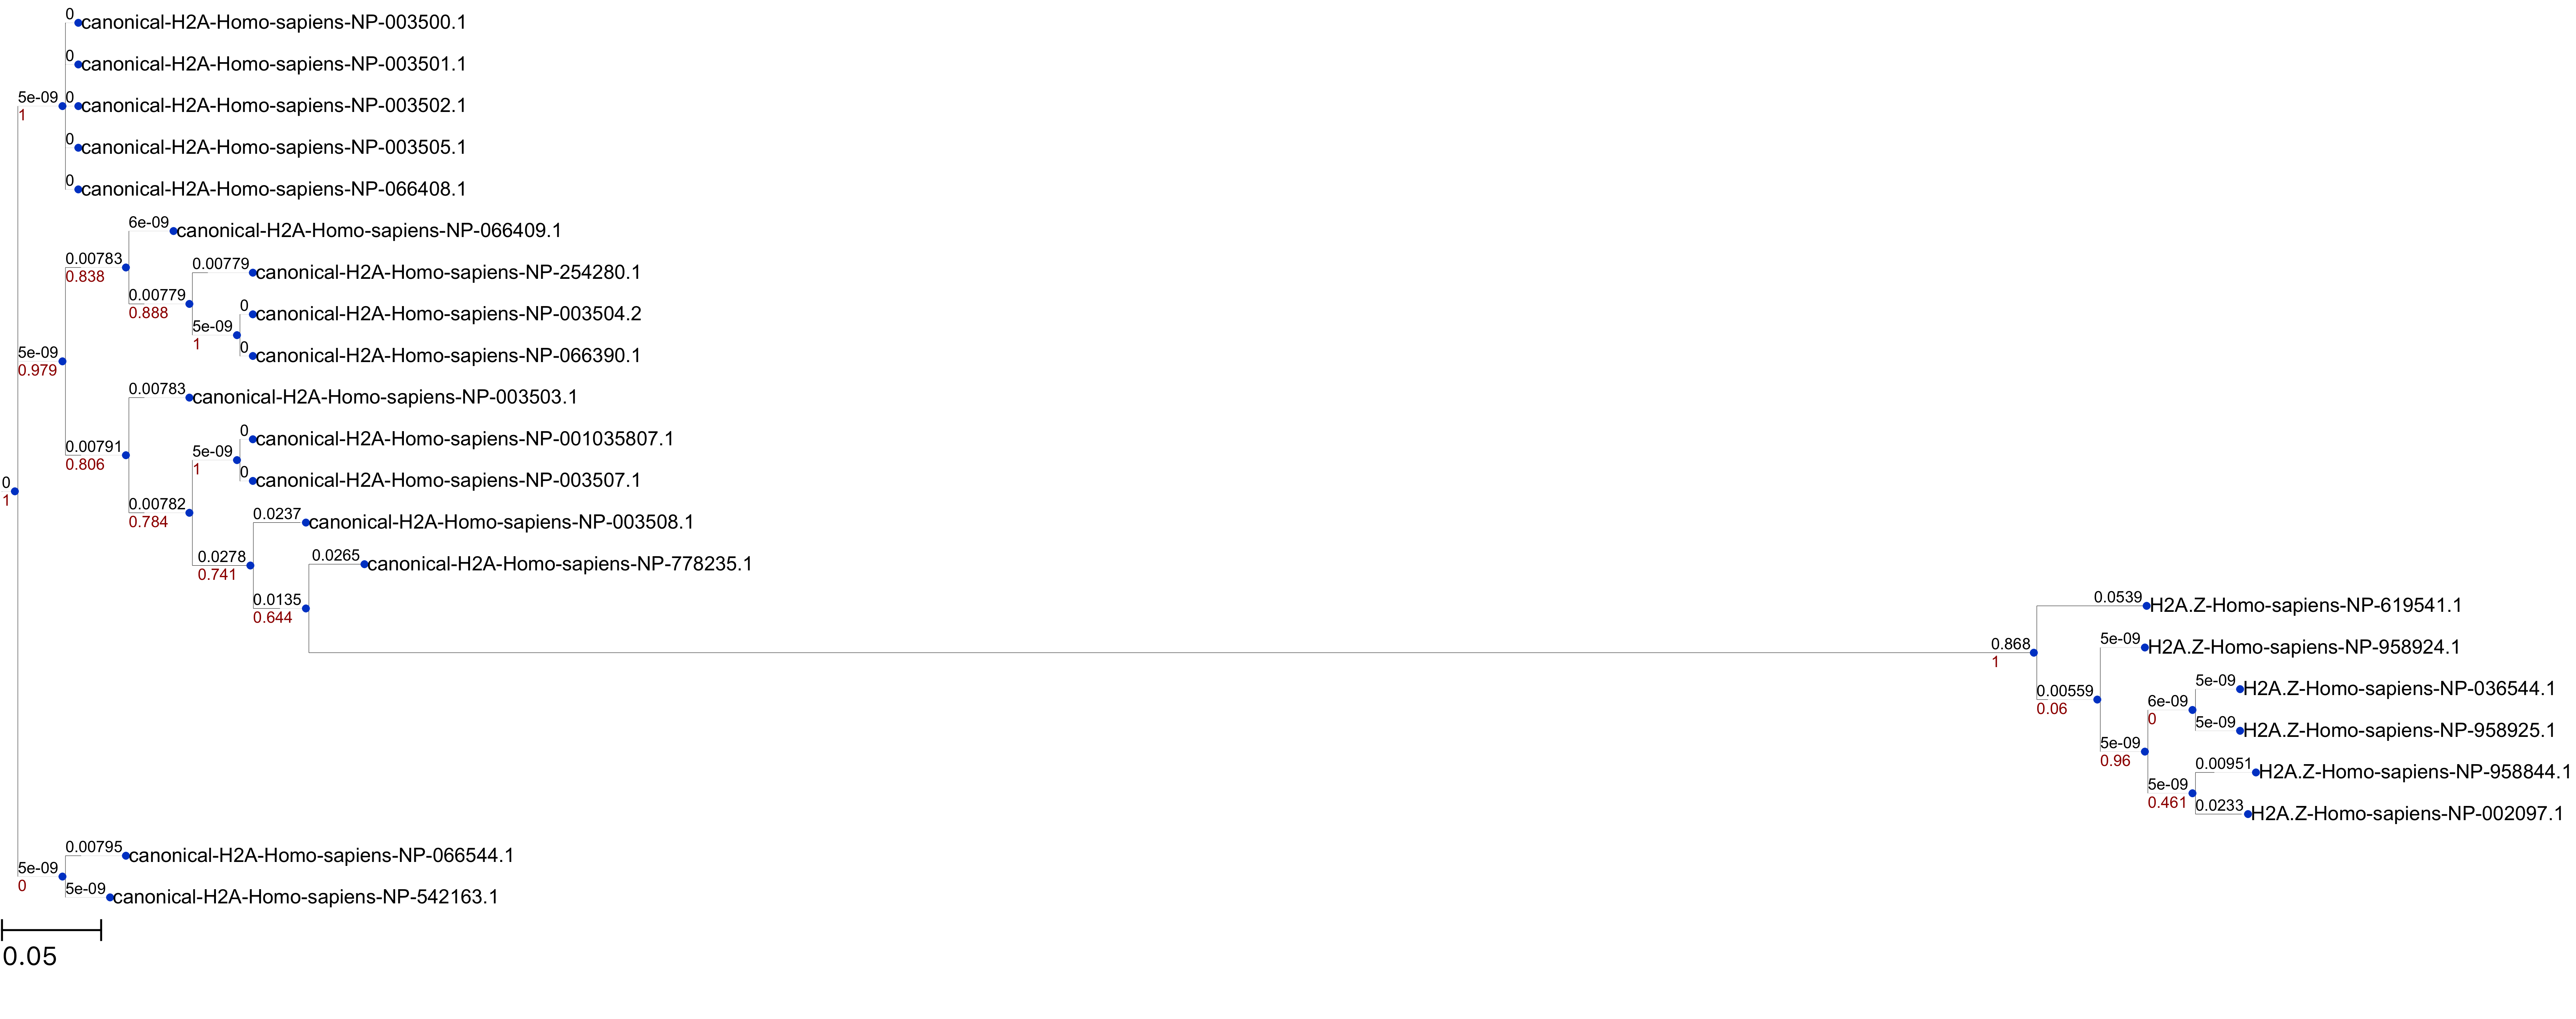

In [165]:
#info about drawing trees http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html
!printf "{msa.format('fasta')}" | FastTree > tmp/tree_file 2> /dev/null
t = Tree("tmp/tree_file")
ts = TreeStyle()
# style.mode = "c" # draw tree in circular mode
ts.scale = 1000
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.render("%%inline", w=2000, units="mm", tree_style=ts)

## Preparation of seed alignments

In [19]:
curated_set.muscle_aln_for_variant() #creates dict with msa for variants, stored in curated_set.msa_variant

>XP_637656.1 histone H2A
MTESETTSKKVNKRVKPVPKSTKAGLIFPVGRIHRMLKNKVPLKRVSILSSVYLAAILEY
LASEVLELTISQVSIQSKEYHNVRRISPRHLLLAIKTDEELDNLIRVSTTIAGGGVIPYI
HEVLKKVEQKPTHPQQKQTIKSI

>ACO10502.1 histone H1
MVKSEVEVTINAEEAPVASSLKPAKKKKNKKKKNKPGKYSVLVLDAVKKLNERSGSSLVK
IYNEAKKASWFDEQNGRTYLRYSIRALVLNNTLIQVKGMGANGSFRLNEDKFAKGVPKKT
QSKPAKNTTKTAKASTTKKATVVKAKSSPKKAPDAKMPAAKLKKLGVKKVSAAQKNKKPK
KASKPPAKSPRKK

>NP_006017.1 histone H1
MSVELEEALPVTTAEGMAKKVTKAGGSAALSPSKKRKNSKKKNQPGKYSQLVVETIRRLG
ERNGSSLAKIYTEAKKVPWFDQQNGRTYLKYSIKALVQNDTLLQVKGTGANGSFKLNRKK
LEGGGERRGAPAAATAPAPTAHKAKKAAPGAAGSRRADKKPARGQKPEQRSHKKGAGAKK
DKGGKAKKTAAAGGKKVKKAAKPSVPKVPKGRK

>ACO07616.1 histone H1
MVKSEVDVTINAEEAPVASGPKPAKKKKKKKKKNKPGKYSVLVLDAVKKLNERSGSSLVK
IYNEAKKASWFDEQNGRTYLRYSIRALVLNNTLIQVKGMGANGSFRLNEDKFAKEVPKKT
QSKPAKTTTKTAKASTTKKATVKPKAKSSPKKAPDAKKPAAKMKKLGVKKVIAAQKNKKP
KKASKPPAKSPRKK

>ACO09903.1 histone H1
MASDTEVVPAAEAPVAAKSKKRTATKPKPKAKPATVATSSAKKKKRKGKGPGKYSVLVVD
AIKQLGERNGSSLAKIYNKAREAIWFDQQHGRTYLRYSIRALVLNDTLIQVKGTGANGS


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 1 seqs, lengths min 143, max 143, avg 143

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 6 seqs, lengths min 193, max 218, avg 203
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   7 

>NP_059141.1 histone H2B
MPEPAKSAPAPKKGSKKAVTKAQKKDGRKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLPHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSAK

>XP_678689.1 histone H2B
MSGKGPAQKSQAAKKTAGKTLGPRHKRKRRTESFSLYIFKVLKQVHPETGVTKKSMNIMN
SFINDIFDRLVTEATRLIRYNKKRTLSSREIQTAVRLLLPGELSKHAVSEGTKAVTKYTT
SGA

>XP_001349046.1 histone H2B
MSGKGPAQKSQAAKKTAGKTLGPRHKRKRRTESFSLYIFKVLKQVHPETGVTKKSMNIMN
SFINDIFDRLVTEATRLIRYNKKRTLSSREIQTAVRLLLPGELSKHAVSEGTKAVTKYTT
SAA

>XP_002369740.1 histone H2B
MSGKGPAQKSQAAKKTAGKSLGPRYRRRKRTESFALYIYKVLKQVHPETGVSKKSMSIMN
SFINDIFDRLADEAVRLIRYNKKRTLSSREIQTAVRLLLPGELSKHAVSEGTKAVTKYTT
SGA

>NP_563627.1 histone H3
MARTKHRVTRSQPRNQTDAAGASSSQAAGPTTTPTRRGGEGGDNTQQTNPTTSPATGTRR
GAKRSRQAMPRGSQKKSYRYRPGTVALKEIRHFQKQTNLLIPAASFIREVRSITHMLAPP
QINRWTAEALVALQEAAEDYLVGLFSDSMLCAIHARRVTLMRKDFELARRLGGKGRPW

>NP_499128.1 histone H3
MADDTPIIEEIAEQNESVTRIMQRLKHDMQRVTSVPGFNTSAAGVNDLIDILNQYKKELE
DDAANDYTEAHIHKIRLVTGKRNQYVLKLKQAEDEYHARKEQARRRASSMDFTVGRNSTN
LVDYSHGRHHMPSYRRHDSSDEENYSMDGTN

00:00:00      5 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   8   66.67%  Refine biparts

>P60008.1 histone H1
MLHASTIWHLRSTPPRRKQWGHCDPHRILVASEVTTEITSPTPAPRAQVCGGQPWVTVLD
PLSGHTGREAERHFATVSISAVELKYCHGWRPAGQRVPSKTATGQRTCAKPCQKPSTSKV
ILRAVADKGTCKYVSLATLKKAVSTTGYDMARNAYHFKRVLKGLVDKGSAGSFTLGKKQA
SKSKLKVKRQRQQRWRSGQRPFGQHRSLLGSKQGHKRLIKGVRRVAKCHCN

>NP_061262.1 histone H1
MAQMVAGDQDAGTLWVPSQSESQTESDISTQSLRKPTMSYVILKTLADKRVHNCVSLATL
KKAVSITGYNMTHNTWRFKRVLQNLLDKGMIMHVTCCKGASGSLCLCKERALKSNHRAKR
CQDRQKSQKPQKPGQRESEPCQLLLSSKKKNDQLFKGVRRVAKGNRHCHY

>ACI22865.1 histone H1
MQRDTLLVSPSAAPNSAVAVDQDASTSDDPSKSETGPYTCPQTMRKPSMSKVILRAVTDK
GLHRRVSLAALKKAVSTTGYNMAHNSWRFKRVVKNLVKKGMLKQVTGKGASGSFRLGKKQ
AFKSKRKARRRQRRQQRQKPRQRRSGPRQSLLGSGRSLKGLF

>NP_001103035.1 histone H1
MSLVSPSPDSNAVMAGDQDASTSQVPSQSESKIGPNVATQTLRKPTMSKVILRTVADKGV
HSRVSLAALKKAVSITGYNMAQNTWRFKRVLQNLVKKGMLKQVTGKGASGSFRLGKKQAF
KSKCKAKRRQRRQKPGQRRTGSRRSLLGSKKSNNRLFKGVRRVAKGRRH

>NP_005310.1 histone H1
MSETAPAAPAAAPPAEKAPVKKKAAKKAGGTPRKASGPPVSELITKAVAASKERSGVSLA
ALKKALAAAGYDVEKNNSRIKLGLKSLVSKGTLVQTKGTGASGSFKLNKKAASGEAKPKV
KKAGGTKPKK

00:00:00      5 MB(0%)  Iter   8  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 4 seqs, lengths min 162, max 231, avg 183
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   9  100.00%  Refine biparts

MUSCLE v3.8.1551 b

>XP_002925981.1 histone H2B
MAEPGCETSSEESLGTEEPSAANPKSPKQKQKQPRRQCRRRCRRCPNSFATYFPRVLKQV
HEGLSLSKKAVSVMDSFLKDIFEHIADEAAHLARSTKGSNKHSTINSREIQTAVRLLLPG
EIGKHTVSKATKAVIRFQRCE

>DAA13058.1 histone H2B
MGIGGSILSETSSDSYEEDVITKETGISEIEPSEKEMAKVETSKPDPYDAEPIKVETSKP
DPYDAEPKKAETSKPDPYDAEPKKAKQKTAKGRRRRRHCHHDSFSSFATYFPRVLRQIHK
GMSLSHDSVNILDSFVKDTFERIAEEAGRLAGDNKRRTITTEDIEAAVRLLLPGKLGKYA
VLKATKSLITYRTCK

>XP_548517.2 histone H2B
MIPGKPEEGKGSSEGPICDTEVACDVRKCSDYKGASAPQQPPLSVLLSCWEGEPHMAEPG
CETSSEECLGTKEPREAEPETPKRKKPRRQCHRRCRRSRSDSFAIYFPRVLKQVDEGLSL
SQKAVSIMDSFVKDIFERIADEASRLARSTKRSTITSREIQTAVRLLLPGEIGKYAVSEA
TKALMRNQVGALEKQVKNVLSLGCG

>NP_001002916.4 histone H2B
MAGPSSETTSEEQLITQEPKEANSTTSQKQSKQRKRGRHGPRRCHSNCRGDSFATYFRRV
LKQVHQGLSLSREAVSVMDSLVHDILDRIATEAGHLARSTKRQTITAWETRMAVRLLLPG
QMGKLAESEGTKAVLRTSLYAIQQQRK

>Q7Z2G1.2 histone H2B
MLRTEVPRLPRSTTAIVWSCHLMATASAMAGPSSETTSEEQLITQEPKEANSTTSQKQSK
QRKRGRHGPRRCHSNCRGDSFATYFRRVLKQVHQGLSLSREAVSVMDSLVHDILDRIATE
AGRLARSTKRQTITAWETRMAVRLLLPGQMGKLAESEGTKAVLRT

00:00:00      2 MB(0%)  Iter   1  100.00%  Align node
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter  10  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter  11  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This soft

>NP_861453.1 histone H1
MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTVGGPSRGCSSSVLRV
SQLVLQAISTHKGLTLAALKKELRNAGYEVRRKSGRHEAPRGQAKATLLRVSGSDAAGYF
RVWKVPKPRRKPGRARQEEGTRAPWRTPAAPRSSRRRRQPLRKAARKAREVWRRNARAKA
KANARARRTRRARPRAKEPPCARAKEEAGATAADEGRGQAVKEDTTPRSGKDKRRSSKPR
EEKQEPKKPAQRTIQ

>NP_081580.2 histone H1
MAEAVQPSGESQGAELTIQIQQPAERALRTPAKRGTQSVLRVSQLLLRAIAGHQHLTLDA
LKKELGNAGYEVRREISSHHEGKSTRLEKGTLLRVSGSDAAGYFRVWKISKPREKAGQSR
LTLGSHSSGKTVLKSPRPLRPRSRRKAAKKAREVWRRKARALKARSRRVRTRSTSGARSR
TRSRASSRATSRATSRARSRARSRAQSSARSSARSSAKSSAKSSTRSSAKSWARSKARSR
ARSRAKDLVRSKAREQAQAREQARARAREQAHARARTQDWVRAKAQEFVSAKEQQYVRAK
EQERAKAREQVRIGARDEARIKAKDYNRVRPTKEDTSPRPAEEKSSNSKLREEKGQEPER
PVKQTIQKPALDNAPSIQGKACTKSFTKSGQPGDTESP

>NP_189372.1 histone H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRFRPGTVALREIRKYQKSTE
LLIRKLPFQRLVREIAQDFKTDLRFQSSAVAALQEAAEAYLVGLFEDTNLCAIHAKRVTI
MPKDIQLARRIRGERA

>NP_509344.1 histone H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGTVALREIRRYQKSTE
LLIRKLPFQRLVREIAQDFKTDLRFQSAAIGALQEA

00:00:00      5 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   7  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 2 seqs, lengths min 129, max 131, avg 130
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      1 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      1 MB(0%)  Iter   1  100.00%  Root alignment

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 10 seqs, lengths min 135, max 193, avg 151
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%) 

>NP_734466.1 histone H2A
MSGRGKQGGKARAKSKSRSSRAGLQFPVGRIHRLLRKGNYAERIGAGAPVYLAAVLEYLT
AEILELAGNASRDNKKTRIIPRHLQLAIRNDEELNKLLGGVTIAQGGVLPNIQAVLLPKK
TESHHHKAQSK

>NP_783589.1 histone H2A
MSGPTKRGGKARAKVKSRSSRAGLQFPVGRVHRLLRQGNYAQRIGAGAPVYLAAVLEYLT
AEVLELAGNAARDNKKTRITPRHLQLAIRNDEELNKLLGRVTIAQGGVLPNIQAVLLPKK
TESHKSQTK

>EAX08008.1 histone H3
MAVAMAGMTQVLVWELHHCPCFLTPVLPAAGQAQPQRGESTRPHNMARTKQTARKATAWQ
APRKPLATKAARKRASPTGGIKKPHRYKPGTLALREIRKYQKSTQLLLRKLPFQRLVREI
AQAISPDLRFQSAAIGALQEASEAYLGVRGTHWASDAVHPWWSKFRNVVNVMAGMVKALD
TKVVEEALDMCEI

>NP_001342187.1 histone H3
MARTKQTARKATAWQAPRKPLATKAAGKRAPPTGGIKKPHRYKPGTLALREIRKYQKSTQ
LLLRKLPFQRLVREIAQAISPDLRFQSAAIGALQEASEAYLVQLFEDTNLCAIHARRVTI
MPRDMQLARRLRREGP

>NP_001358848.1 histone H3
MARTKQTARKATAWQAPRKPLATKAARKRASPTGGIKKPHRYKPGTLALREIRKYQKSTQ
LLLRKLPFQRLVREIAQAISPDLRFQSAAIGALQEASEAYLVQLFEDTNLCAIHARRVTI
MPRDMQLARRLRGEGAGEPTLLGNLAL

>NONCBI_H3Y_1 histone H3
ARTKQTARKATAWQAPRKPLATKAAGKRAPPTGGIKKPHRYKPGTLALREIRKYQKSTQL
LLRKLPFQRLVREIAQAISPDLRFQSAAIG

00:00:00      2 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   7  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 17 seqs, lengths min 105, max 185, avg 123
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      3 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      3 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      3 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00      3 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      3 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      3 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      3 MB


>XP_011216221.1 histone H2B
MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSSK

>Q9FFC0.3 histone H2B
MAKADKKPAEKKPAEKTPAAEPAAAAEKKPKAGKKLPKEPAGAGDKKKKRSKKNVETYKI
YIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAGESSKLARYNKKPTITSREIQTAVR
LVLPGELAKHAVSEGTKAVTKFTSS

>Q9LQQ4.3 histone H2B
MAPRAEKKPAEKKTAAERPVEENKAAEKAPAEKKPKAGKKLPPKEAGDKKKKRSKKNVET
YKIYIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAQESSKLARYNKKPTITSREIQT
AVRLVLPGELAKHAVSEGTKAVTKFTSS

>Q9LZ45.3 histone H2B
MAPKAEKKPAEKAPAPKAEKKIAKEGGTSEIVKKKKKTKKSTETYKIYIFKVLKQVHPDI
GISGKAMGIMNSFINDIFEKLAQESSRLARYNKKPTITSREIQTAVRLVLPGELAKHAVS
EGTKAVTKFTSS

>Q9LZT0.3 histone H2B
MAPKAEKKPAEKKPVEEKSKAEKAPAEKKPKAGKKLPKEAGAGGDKKKKMKKKSVETYKI
YIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLASESSKLARYNKKPTITSREIQTAVR
LVLPGELAKHAVSEGTKAVTKFTSS

>NP_001032546.1 histone H2B
MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSSK

>NP_50546

00:00:01      5 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:01      5 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:01      5 MB(0%)  Iter  10  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 5 seqs, lengths min 137, max 144, avg 141
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      2 MB(

>P02291.2 histone H2B
MPRSPAKTSPRKGSPRKGSPSRKASPKRGGKGAKRAGKGGRRRRVVKRRRRRRESYGIYI
YKVLKQVHPDTGISSRAMSVMNSFVNDVFERIAGEASRLTSANRRSTVSSREIQTAVRLL
LPGELAKHAVSEGTKAVTKYTTSR

>Q27749.3 histone H2B
MPSQKSPTKRSPTKRSPQKGGKGAKRGGKAGKRRRGVAVKRRRRRRESYGIYIYKVLKQV
HPDTGISSRAMSVMNSFVNDVFERIASEAGRLTTYNRRNTVSSREVQTAVRLLLPGELAK
HAVSEGTKAVTKYTTSR

>Q27750.3 histone H2B
MPKSPSKSSPRKGSPRKGSPRKGSPKRGGKGAKRAGKGGRRNVVKRRRRRRESYGIYIYK
VLKQVHPDTGISSRGMSVMNSFVNDVFERIAGEASRLTSANRRSTISSREIQTAVRLLLP
GELAKHAVSEGTKAVTKYTTARR

>NP_999706.1 histone H2B
MPSQRSPTKRSPTKRSPQKGAGKGGKGSKRGGKARRRGGAAVRRRRRRRESYGIYIYKVL
KQVHPDTGISSRGMSIMNSFVNDVFERVAAEASRLTKYNRRSTVSSREIQTAVRLLLPGE
LAKHAVSEGTKAVTKYTTSR

>NP_999721.1 histone H2B
MPRSPSKTSPRKGSPRRGSPSRKASPKRGGKGAKRAGKGGRRRNVVRRRRRRRESYGIYI
YKVLKQVHPDTGISSRGMSVMNSFVNDIFGRIAGEASRLTRANRRSTISSREIQTAVRLL
LPGELAKHAVSEGTKAVTKYTTSR

>NP_198119.1 histone H2A
MESSQATTKPTRGAGGRKGGDRKKSVSKSVKAGLQFPVGRIARYLKKGRYALRYGSGAPV
YLAAVLEYLAAEVLELAGNAARDNKKNRINPRHLCLAIRNDEELGRLLHGVTIASGGVLP
NINPVLLPK

00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   6  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 2 seqs, lengths min 258, max 268, avg 263
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 2 seqs, lengths min 135, max 136, avg 135
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter  

>NP_172161.1 histone H1
MSEVEIENAATIEGNTAADAPVTDAAVEKKPAAKGRKTKNVKEVKEKKTVAAAPKKRTVS
SHPTYEEMIKDAIVTLKERTGSSQYAIQKFIEEKRKELPPTFRKLLLLNLKRLVASGKLV
KVKASFKLPSASAKASSPKAAAEKSAPAKKKPATVAVTKAKRKVAAASKAKKTIAVKPKT
AAAKKVTAKAKAKPVPRATAAATKRKAVDAKPKAKARPAKAAKTAKVTSPAKKAVAATKK
VATVATKKKTPVKKVVKPKTVKSPAKRASSRVKK

>XP_010816821.1 histone H1
MSEVALPAPAASTSPEKPSAGKKAKKPAKAAAAAKKKPAGPSVSELIVQAVSSSKERSGV
SLAALKKALAAAGYDVEKNNSRIKLGLKSLVGKGTLVQTKGTGASGSFKLNKKVASVDAK
PTATKVATKTKVTSASKKPKKASGAAAAKKSVKTPKKARKSVLTKKSSKSPKKPKAVKPK
KVAKSPAKAKAVKPKGAKVKVTKPKTAAKPKKAAPKKK

>O17536.3 histone H1
MSDVAVAADTTETPAAPTKASKATKASKATKASKATKAKTTKVPMVKADAAHPPFINMVT
EAISSIKDRKGPSRAAILKYITTKYTLGDQANKINAHLRKALNKGLESNAFVQASGNGAN
GRFRLAEKTASVAKSPAAAKKDATGEKKATTTVAKKAATGEKKATTTVAKKAATGEKKAT
TTVAKKAAAGDKAKKTEVKVKKVKSPKKIAKSPVNKVTKSPVKKIAKSSSMKAAPKKAAA
KPAKKAPAAAPEA

>AAZ66580.1 histone H1
MSDSAVATSASPVAAPPATVEKKVVQKKASGSAGTKAKKASATPSHPPTQQMVDASIKNL
KERGGSSLLAIKKYITATYKCDAQKLAPFIKKYLKSAVVNGKLIQTKGKGASGSFKLSAS
AKKEKDPKAKSKVLSAEKKVQ

00:00:00      4 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter  10  100.00%  Refine biparts
00:00:00      4 MB(0%)  Iter  10  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 21 seqs, lengths min 136, max 138, avg 136
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      3 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      3 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      3 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00      3 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      3 MB

>NP_001020673.1 histone H2A
MSARGGKKKITKLSRSARAGVIFPVGRMMRYLRTGTHKYRIGMGAPVYMAAVIEYLAAEI
LELAGNAARDNKKGRITPRHIKLAVANDEELNQLLRGVTISNGGVLPRIHPELLSKKRGG
KVKVESQVAVPEKSAKRKPVKKPYKKSKGKPGRKPKKSTENDKEADANAMEDGPGEGFTI
LSAKSLFLGQKLSLTESEISKIGTIKVEGIINPTNAEIDLKEGIGNALEKTGGKDFLETV
KELRKSQGPLEVASVAVSQANGMAARFIIHCHVPQWGSDKCEDQLEKTVKNCLSAAEEKK
LKSVAFPSLPAGRNGFPKQTAAQLILKAISNHFVSATTSSLKNIYFVLFDSESIGIYLQE
MAKMDAK

>AAC28846.1 histone H2A
MSSRGGKKKSTKTSRSAKAGVIFPVGRMLRYIKKGHPKYRIGVGAPVYMAAVLEYLTAEI
LELAGNAARDNKKGRVTPRHILLAVANDEELNQLLKGVTIASGGVLPNIHPELLAKKRGS
KGKLEAIITPPPAKKAKSPSQKKTVSKKTGGKKGARKSKKKQGEVSKSASADSTTEGTPA
DGFTVLSTKSLFLGQKLQVVQADIATIDSDAVVHPTNSDFYTGGEVGSTLEKKGGKEFVE
AVIELRKKNGPLDIAGAVVSAGHGLPAKFVIHCNSPGWGSDKCEELLEKTVKNCLALADE
KKLKSIAFPSIGSGRNGFPKQTAAQLILKAISSYFVSTMSSSIKTVYFVLFDSESIGIYV
QEMAKLDAN

>NP_001264267.1 histone H2A
MSGRSGKKKMSKLSRSSRAGVIFPVGRMMRYLKKGTYKYRIGVGAPVYMAAVIEYLAAEI
LELAGNAARDNKKGRIAPRHILLAVANDEELNQLLKGVTIASGGVLPRIQPELLAKKRGA
KGKSETILSPAPEKKGRKSMVSKKSGKKAKSNKARTPKKNKQKDSE

00:00:00      5 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   8   80.95%  Refine biparts

>NP_001069955.1 histone H1
MTENSTSTPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKV
GENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAKSDEPKRSVAFKKTKKEVKKVATP
KKAAKPKKAASKAPSKKPKATPVKKAKKKPAATPKKTKKPKTVKAKPVKASKPKKTKPVK
PKAKSSAKRTGKKK

>P06513.2 histone H1
MTDSPIPAPAPAAKPKRAKAPRKPASHPSYSEMIVAAIRAEKSRGGSSRQSIQKYVKSHY
KVGQHADLQIKLSIRRLLAAGVLKQTKGVGASGSYRLAKGDKAKKSPAGRKKKKKAARRS
TSPRKAARPRKARSPAKKPKAAARKARKKSRASPKKAKKPKTVKAKSLKTSKVKKAKRSK
PRAKSGARKSPKKK

>XP_010887142.1 histone H1
MAETVAAPAPKAKKAKAPKKPASHPKYSDMIKAAVQADKSRGGASRQSVQKYIKSHYKVG
DNADSQIKLSLKRMVSGGLLRHTKGIGASGSFKLAKAEDTKKAPKPKPVVKAKKSPVKAA
KPKKVAKPKKVVKSPAKAKKAKVAVKKVKKSPKKVAPKPKKVVKKVKAAKPAKAVKPKKA
KAAKPKPKAAAKKAAKKK

>NP_001038138.1 histone H1
MTESLVLSPAPAKPKRVKASRRSASHPTYSEMIAAAIRAEKSRGGSSRQSIQKYIKSHYK
VGHNADLQIKLSIRRLLAAGVLKQTKGVGASGSFRLAKSDKAKRSPGKKKKAVRRSTSPK
KAARPRKARSPAKKPKATARKARKKSRASPKKAKKPKTVKAKSRKASKAKKVKRSKPRAK
SGARKSPKKK

>NP_005309.1 histone H1
MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKV
GENADSQIKLSIKRLVT

00:00:00      5 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter  10  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter  11  100.00%  Refine biparts
00:00:00      5 MB(0%)  Iter  12  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 3 seqs, lengths min 207, max 346, avg 285
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:00      2 MB(0%)  Iter   4  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This softw

{'generic_H2A': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 143, SingleLetterAlphabet()) at 7fd02026ef50>,
 'H1.10': <<class 'Bio.Align.MultipleSeqAlignment'> instance (6 records of length 229, SingleLetterAlphabet()) at 7fd02026ee50>,
 'H2A.J': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 129, SingleLetterAlphabet()) at 7fd02026e710>,
 'H2B.1': <<class 'Bio.Align.MultipleSeqAlignment'> instance (4 records of length 127, SingleLetterAlphabet()) at 7fd01f192050>,
 'H1.1': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 215, SingleLetterAlphabet()) at 7fd0192fce90>,
 'H1.3': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 221, SingleLetterAlphabet()) at 7fd02026e650>,
 'H2A.X': <<class 'Bio.Align.MultipleSeqAlignment'> instance (23 records of length 165, SingleLetterAlphabet()) at 7fd02026e3d0>,
 'H2B.S': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1 records of length 126, Singl

00:00:00      3 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:00      3 MB(0%)  Iter   8  100.00%  Refine biparts


In [20]:
a = curated_set.muscle_aln(accessions=['XP_011215280.1', 'XP_011216221.1', 'XP_011215272.1'])

>XP_011215280.1 histone H2A
MSGRGKQGGKARAKAKSRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLT
AEILELAGNAARDNKKTRIIPRHLQLAIRNDEELNKLLGRVTIAQGGVLPNIQAVLLPKK
TESHHKAKGK

>XP_011216221.1 histone H2B
MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSSK

>XP_011215272.1 histone H2A
MPGDRSRRGSSSGQRRTRSRTARAELSFSVSHVERLLREGHYAQRLGSSAPVFLAAVIQY
LTAKVLELAGNEAQNSGGRRITPQLVDMAVHNHALLSGFFGTTTISQVAPAWN




MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 3 seqs, lengths min 113, max 130, avg 123
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      2 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00      2 MB(0%)  Iter   3  100.00%  Refine biparts


## Generate seeds

In [21]:
curated_set.generate_seeds()

##########Starting H2A.P H2A H2A.P.fasta
SingleLetterAlphabet() alignment with 11 rows and 126 columns
--------MSEKNNRKNSSANNNQIQDR-SRNELRVPMSFVDRV...KND EHH30639.1
-EPNPANIMSEKKNCKNSSTNNNQTQDP-SRNELQVPRSFVDRV...KND AAC26851.1
--------MSEKKNCKNSSTNNNQTQDP-SRNELQVPMSFVDRV...KND XP_003317470.1
--------MSEKKNCKNSSTNNNQTQDP-SRNELQVPRSFVDRV...KND NP_036406.1
-------MMCEQKSQYGSYKDNNQQEDPASRPEQQLPVSDIYCI...KKG EHB10562.1
--------MSGKKNQGKSCSDNKKMEDPSSKPEVQIPVNYVYHL...RNG XP_003508203.1
--------MSEKKSQEKPCSDNNQIEDPSSRPEVQVPVNYVYRI...RNG NP_080372.1
--------MSGKKSQEKACSDNKQTEDPSSRPEVQVPVNYVYRL...RNG NP_001128070.1
--------MSGKQSPEGSYEAPTHL----TTTEPQVPVSFVDHL...RNG XP_003135058.1
MEPNPANIMSGNKNHESSNQTQAHL----VTTELQFPVSYVDRL...RNG XP_005641297.1
--------MSGKKSHESSYQTQAHL----ITTELQVPVSYVDRL...RNG XP_002913536.1
SingleLetterAlphabet() alignment with 11 rows and 126 columns
--------MSGKKSHESSYQTQAHL----ITTELQVPVSYVDRL...RNG Ailuropoda melanoleuca|XP_002913536.1|H2A.P
MEPNPANIMSGNKNHESSNQTQAHL----VTT


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 58 seqs, lengths min 135, max 398, avg 219
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     11 MB(0%)  Iter   1  100.00%  Align node       
00:00:00     11 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00     11 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00     11 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00     11 MB(0%)  Iter   2  100.00%  Root alignment
00:00:02     11 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:03     11 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:04     11 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:04     11 MB(0%)  Iter   5  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, 

>NP_189372.1 histone H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRFRPGTVALREIRKYQKSTE
LLIRKLPFQRLVREIAQDFKTDLRFQSSAVAALQEAAEAYLVGLFEDTNLCAIHAKRVTI
MPKDIQLARRIRGERA

>NP_563627.1 histone H3
MARTKHRVTRSQPRNQTDAAGASSSQAAGPTTTPTRRGGEGGDNTQQTNPTTSPATGTRR
GAKRSRQAMPRGSQKKSYRYRPGTVALKEIRHFQKQTNLLIPAASFIREVRSITHMLAPP
QINRWTAEALVALQEAAEDYLVGLFSDSMLCAIHARRVTLMRKDFELARRLGGKGRPW

>NP_195713.1 histone H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGTVALREIRKYQKSTE
LLIRKLPFQRLVREIAQDFKTDLRFQSHAVLALQEAAEAYLVGLFEDTNLCAIHAKRVTI
MPKDIQLARRIRGERA

>NP_509344.1 histone H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPTTGGVKKPHRYRPGTVALREIRRYQKSTE
LLIRKLPFQRLVREIAQDFKTDLRFQSAAIGALQEASEAYLVGLFEDTNLCAIHAKRVTI
MPKDIQLARRIRGERA

>NP_499128.1 histone H3
MADDTPIIEEIAEQNESVTRIMQRLKHDMQRVTSVPGFNTSAAGVNDLIDILNQYKKELE
DDAANDYTEAHIHKIRLVTGKRNQYVLKLKQAEDEYHARKEQARRRASSMDFTVGRNSTN
LVDYSHGRHHMPSYRRHDSSDEENYSMDGTNGDGNRAGPSNPDRGNRTGPSSSDRVRMRA
GRNRVTKTRRYRPGQKALEEIRKYQKTEDLLIQKAPFARLVREIMQTSTPFGADCRIRSD
AISALQEAAEAFLVEMFEGSSLISTHAKRVTLMT

00:00:00     11 MB(0%)  Iter   1  100.00%  Align node
00:00:00     11 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00     11 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00     11 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00     11 MB(0%)  Iter   2  100.00%  Root alignment
00:00:01     11 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:01     11 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:01     11 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:01     11 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:01     11 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:01     11 MB(0%)  Iter   7  100.00%  Refine biparts1 MB(0%)  Iter   7   45.03%  Refine biparts
00:00:02     11 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:02     11 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:02     11 MB(0%)  Iter  10  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Ac

>XP_011216221.1 histone H2B
MPDPAKSAPAPKKGSKKAVTKVQKKDGKKRKRSRKESYSVYVYKVLKQVHPDTGISSKAM
GIMNSFVNDIFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVT
KYTSSK

>XP_002925981.1 histone H2B
MAEPGCETSSEESLGTEEPSAANPKSPKQKQKQPRRQCRRRCRRCPNSFATYFPRVLKQV
HEGLSLSKKAVSVMDSFLKDIFEHIADEAAHLARSTKGSNKHSTINSREIQTAVRLLLPG
EIGKHTVSKATKAVIRFQRCE

>XP_002921383.1 histone H2B
MARSITKKNKRSRGHRSPISKKKSHSSTDFGRRNYSLYINRVLKEVVPQRSISSRTLDVM
NTLIKDIFERISVEARSLMCFRNRCTLTPEDIQKAVYLLLPGKLAKYAVAFGSEAVQRYV
QS

>Q9FFC0.3 histone H2B
MAKADKKPAEKKPAEKTPAAEPAAAAEKKPKAGKKLPKEPAGAGDKKKKRSKKNVETYKI
YIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAGESSKLARYNKKPTITSREIQTAVR
LVLPGELAKHAVSEGTKAVTKFTSS

>Q9LQQ4.3 histone H2B
MAPRAEKKPAEKKTAAERPVEENKAAEKAPAEKKPKAGKKLPPKEAGDKKKKRSKKNVET
YKIYIFKVLKQVHPDIGISSKAMGIMNSFINDIFEKLAQESSKLARYNKKPTITSREIQT
AVRLVLPGELAKHAVSEGTKAVTKFTSS

>Q9LZ45.3 histone H2B
MAPKAEKKPAEKAPAPKAEKKIAKEGGTSEIVKKKKKTKKSTETYKIYIFKVLKQVHPDI
GISGKAMGIMNSFINDIFEKLAQESSRLARYNKKPTITSREIQTAVRLVLPGELAKHAVS
EGTKAVTKFTSS

>Q9LZT0.3 hi

00:00:00      8 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:01      8 MB(0%)  Iter  10  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

- 27 seqs, lengths min 98, max 103, avg 102
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      3 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      3 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00      3 MB(

>NP_180441.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
IFLENVIRDAVTYTEHARRKTVTAMDVVYALKRQGRTLYGFGG

>NP_492641.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYCEHAKRKTVTAMDVVYALKRQGRTLYGFGG

>NP_001027352.1 histone H4
MTGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYTEHAKRKTVTALDVVYALKRQGRTLYGFGG

>NP_001032934.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG

>XP_012928609.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG

>NP_001029249.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG

>NP_003486.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLK
VFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG

>NP_003529.1 histone H4
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEE

00:00:00     21 MB(0%)  Iter   1  100.00%  Align node
00:00:00     21 MB(0%)  Iter   1  100.00%  Root alignment
00:00:00     21 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:00     21 MB(0%)  Iter   2  100.00%  Root alignment
00:00:00     21 MB(0%)  Iter   2  100.00%  Root alignment
00:00:04     21 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:08     21 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:08     21 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:08     21 MB(0%)  Iter   5  100.00%  Refine biparts


EHH30639.1 histone H2A
-------------------EHH30639.1
AAC26851.1 histone H2A
-------------------AAC26851.1
XP_003317470.1 histone H2A
-------------------XP_003317470.1
NP_036406.1 histone H2A
-------------------NP_036406.1
EHB10562.1 histone H2A
-------------------EHB10562.1
XP_003508203.1 histone H2A
-------------------XP_003508203.1
NP_080372.1 histone H2A
-------------------NP_080372.1
NP_001128070.1 histone H2A
-------------------NP_001128070.1
XP_003135058.1 histone H2A
-------------------XP_003135058.1
XP_005641297.1 histone H2A
-------------------XP_005641297.1
XP_002913536.1 histone H2A
-------------------XP_002913536.1
XP_002403551.1 histone H2A
-------------------XP_002403551.1
XP_001704715.1 histone H2A
-------------------XP_001704715.1
XP_845905.1 histone H2A
-------------------XP_845905.1
XP_641587.1 histone H2A
-------------------XP_641587.1
XP_637656.1 histone H2A
-------------------XP_637656.1
XP_846259.1 histone H2A
-------------------XP_846259.1
NP_014631.1 histone H2A